In [93]:
from roboflow import Roboflow
import matplotlib.pyplot as plt

rf = Roboflow(api_key="NtkfWbxTWAo8v7mzTFxm")
project = rf.workspace().project("aicook-lcv4d")
model = project.version(3).model

loading Roboflow workspace...
loading Roboflow project...


In [94]:
# visualize your prediction
for num in [0,10,20,30,40,50,60]:
    model.predict("kitchen_test.jpeg", confidence=num, overlap=30).plot()

In [67]:
model.predict("test_fridges/test_1.jpg", confidence=30, overlap=30).json()

{'predictions': [{'x': 673.0,
   'y': 1847.5,
   'width': 250.0,
   'height': 183.0,
   'confidence': 0.9049413800239563,
   'class': 'potato',
   'image_path': 'test_fridges/test_1.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 619.5,
   'y': 868.5,
   'width': 191.0,
   'height': 263.0,
   'confidence': 0.8956500291824341,
   'class': 'sugar',
   'image_path': 'test_fridges/test_1.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 635.5,
   'y': 1281.0,
   'width': 219.0,
   'height': 134.0,
   'confidence': 0.8827596306800842,
   'class': 'tomato',
   'image_path': 'test_fridges/test_1.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 1000.0,
   'y': 1903.0,
   'width': 266.0,
   'height': 170.0,
   'confidence': 0.8669441938400269,
   'class': 'chicken_breast',
   'image_path': 'test_fridges/test_1.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 838.0,
   'y': 449.0,
   'width': 128.0,
   'height': 120.0,
   'confidence': 0.8658293485

In [123]:
def crop_fridge_objects(fp, confidence):
    
    im = Image.open(fp)
    im_small = im.resize((1000,1000))
    im_small.save(f'{fp}_small.jpeg')
    
    output_json = model.predict(f'{fp}_small.jpeg', confidence=confidence, overlap=30).json()
    image_list = []
    for items in output_json['predictions']:
        image_list.append(im_small.crop((items['x'] - (items['width']/2),items['y'] - (items['height']/2),\
                                         items['x'] + (items['width']/2),items['y'] + (items['height']/2)
                                        )))
    
    return image_list

In [124]:
images = crop_fridge_objects('test_fridges/test_1.jpg',30)

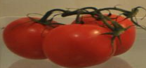

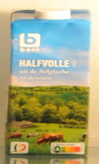

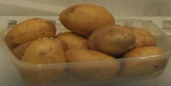

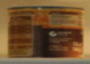

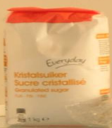

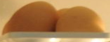

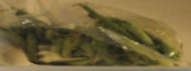

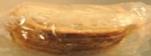

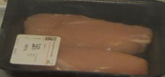

In [125]:
for image in images:
    display(image)

In [91]:
im = Image.open('test_fridges/test_1.jpg')
im1 = im.crop((548,1756,798,1939))

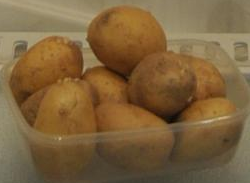

In [92]:
im1

In [87]:
img3.save('test_fridges/lewagon_fridge2_small.jpeg')

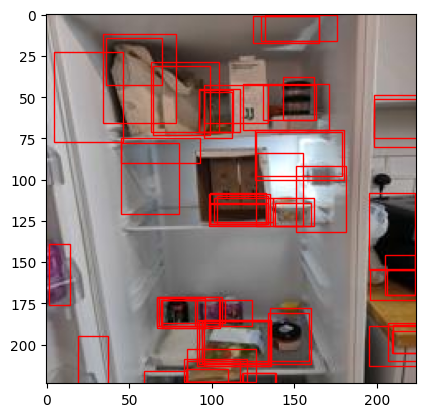

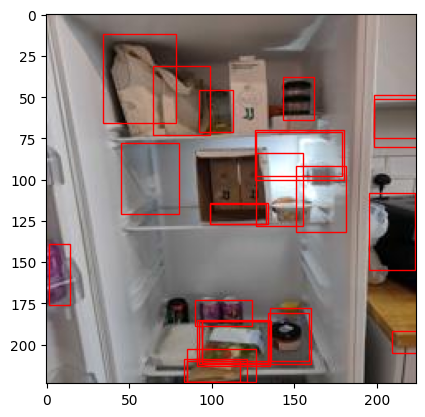

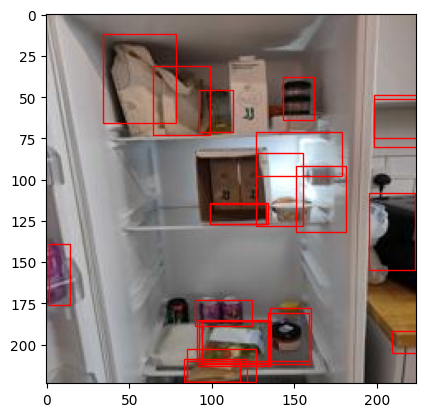

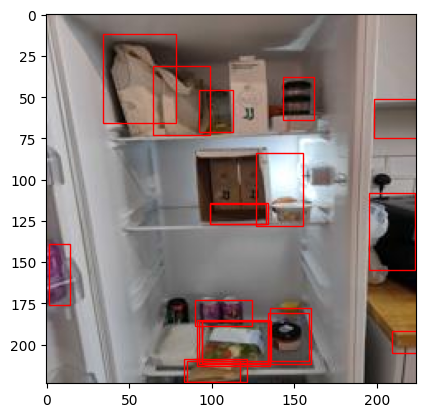

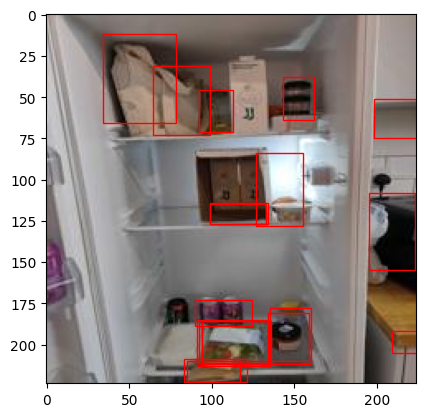

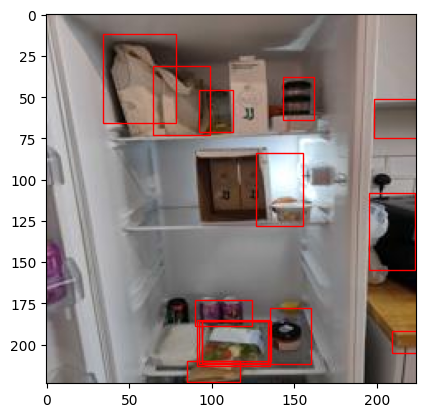

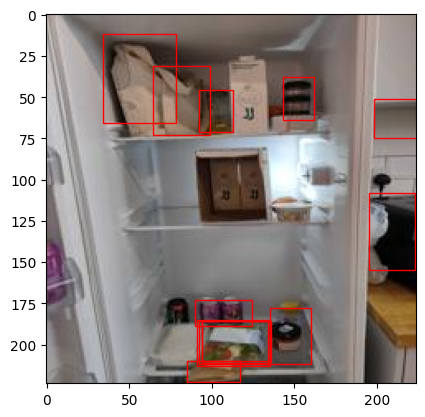

In [89]:
for num in [0,10,20,30,40,50,60]:

    # visualize your prediction w/in a notebook
    model.predict('test_fridges/lewagon_fridge2_small.jpeg', confidence=num, overlap=30).plot()